# 1. Pythonの基本とサイコロ


まずは Python と jupyter の使い方に慣れつつ確率の基本を思い出すことにしよう．


## Python でサイコロ

確率・統計と言えばサイコロ．Pythonでは0以上1未満の浮動小数点を生成する `random()` を使って作ることができる．例えば20回サイコロを振るには下のように書ける．`for`ループの書き方などが他の言語とちょっと違い，Perlなどの `foreach` に近い．`range()`を多用するので，慣れよう．

In [5]:
import random
import math

for i in range(20):
    r = math.ceil(6 * random.random())
    print(r, end=" ")

print()

6 6 2 6 4 4 2 4 1 6 4 4 5 2 6 5 1 5 4 1 


さて，このサイコロはまともなサイコロだろうか？ 出る目が偏っていないか，_N_回振って確認してみよう．Python には `printf` がなく． `str.format()` を使う．`printf`的な書き方も可能で，参考までにコメントで載せておく．フォーマット文字列と変数リストの区切りが `,` ではなくて `%` なことに注意．

In [9]:
# param: N - 試行回数
N = 100

count = [0,0,0,0,0,0]

for i in range(N):
    count[math.ceil(6 * random.random()) - 1] += 1

for i in range(6):
    print('{} : {}/{} ({:.3f})'.format(i+1, count[i], N, count[i]/N))
#    print("%d : %d/%d (%.3f)" % (i+1, count[i], N, count[i]/N)) # printfっぽい書き方

1 : 19/100 (0.190)
2 : 14/100 (0.140)
3 : 19/100 (0.190)
4 : 17/100 (0.170)
5 : 13/100 (0.130)
6 : 18/100 (0.180)


$N=100$では結構偏っているようだが，回数を増やせばすべての目の出現確率は 1/6 = 0.1666... に収束するはずだ．(実は乱数が**ちゃんとランダムか**，というのは非常に重要な問題なのだが，さしあたりここは Python の `random()` は十分に「ちゃんとした」乱数列を発生させていると信じることにしよう．詳しくは付録1を参照．)

## Python: グラフを描く

Python では`matplotlib`を使って様々なグラフを描くことができる．試行回数を増やしていった際に1がでる確率がどのように変わるかをプロットしてみよう．


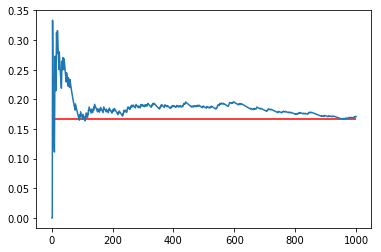

<Figure size 432x288 with 0 Axes>

In [13]:
from matplotlib import pyplot

# param: Nmax - 試行回数の上限
Nmax = 1000

count = 0
x = []
y = []

for i in range(Nmax):
    if math.ceil(6 * random.random()) == 1:
        count += 1
    x.append(i+1)
    y.append(count/(i+1))

pyplot.hlines([1/6], 0, Nmax, "red")
pyplot.plot(x,y)
pyplot.show()
pyplot.clf()


どうやらちゃんと 0.1666... に収束しているようだが，10000回振っても結構ずれていることが分かる．(実行するたびに結果が変わるので何度か実行してみよう．)

## サイコロの各種性質の確認

練習として，サイコロのもつ性質を Python で確認してみよう．

サイコロの性質についての詳細はWikipediaのサイコロの項を参照．
https://ja.wikipedia.org/wiki/%E3%82%B5%E3%82%A4%E3%82%B3%E3%83%AD#%E5%87%BA%E7%9B%AE%E3%81%AB%E9%96%A2%E3%81%99%E3%82%8B%E5%90%84%E7%A8%AE%E3%81%AE%E5%80%A4